In [1]:
#Carbon Dioxide Emission in India.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading data
df = pd.read_excel('Co2E.xlsx')
df.head()

,Entity,Code,Year,Annual CO2 emissions
0,India,IND,1950,61102630
1,India,IND,1951,64022190
2,India,IND,1952,67426220
3,India,IND,1953,68704904
4,India,IND,1954,72413710


In [4]:
#converting year coloumn in date format for graphical representation
df['Year'] = pd.to_datetime(df['Year'],format = '%Y')
df.head()

,Entity,Code,Year,Annual CO2 emissions
0,India,IND,1950-01-01,61102630
1,India,IND,1951-01-01,64022190
2,India,IND,1952-01-01,67426220
3,India,IND,1953-01-01,68704904
4,India,IND,1954-01-01,72413710


In [5]:
#setting year as index column
df.set_index('Year',inplace=True)
df.head()

,Entity,Code,Annual CO2 emissions
Year,,,
1950-01-01,India,IND,61102630
1951-01-01,India,IND,64022190
1952-01-01,India,IND,67426220
1953-01-01,India,IND,68704904
1954-01-01,India,IND,72413710


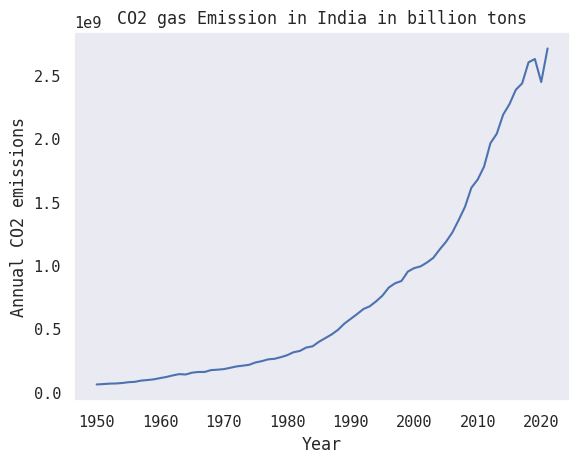

In [6]:
#line plot of carbon dioxide emission
sns.set_theme(style = 'dark',font = 'monospace')
sns.lineplot(x = df.index,y=df['Annual CO2 emissions']).set(title='CO2 gas Emission in India in billion tons')
plt.savefig('co2emission.png', dpi=300, bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

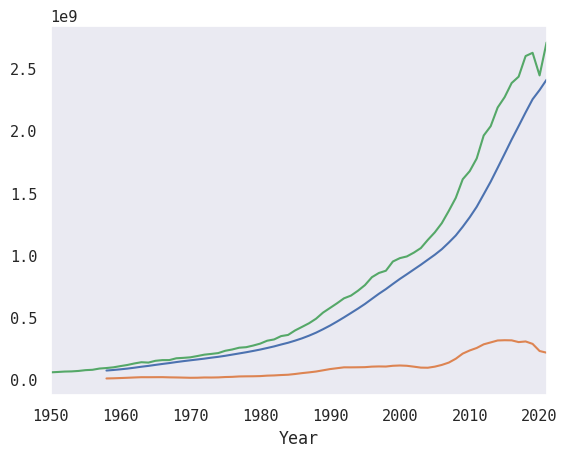

In [7]:
#mean and standard deviation
timeseries = df ['Annual CO2 emissions']
timeseries.rolling(9).mean().plot(label='12 year Rolling Mean')
timeseries.rolling(9).std().plot(label='12 year Rolling Std')
timeseries.plot()
plt.legend

<Figure size 640x480 with 0 Axes>

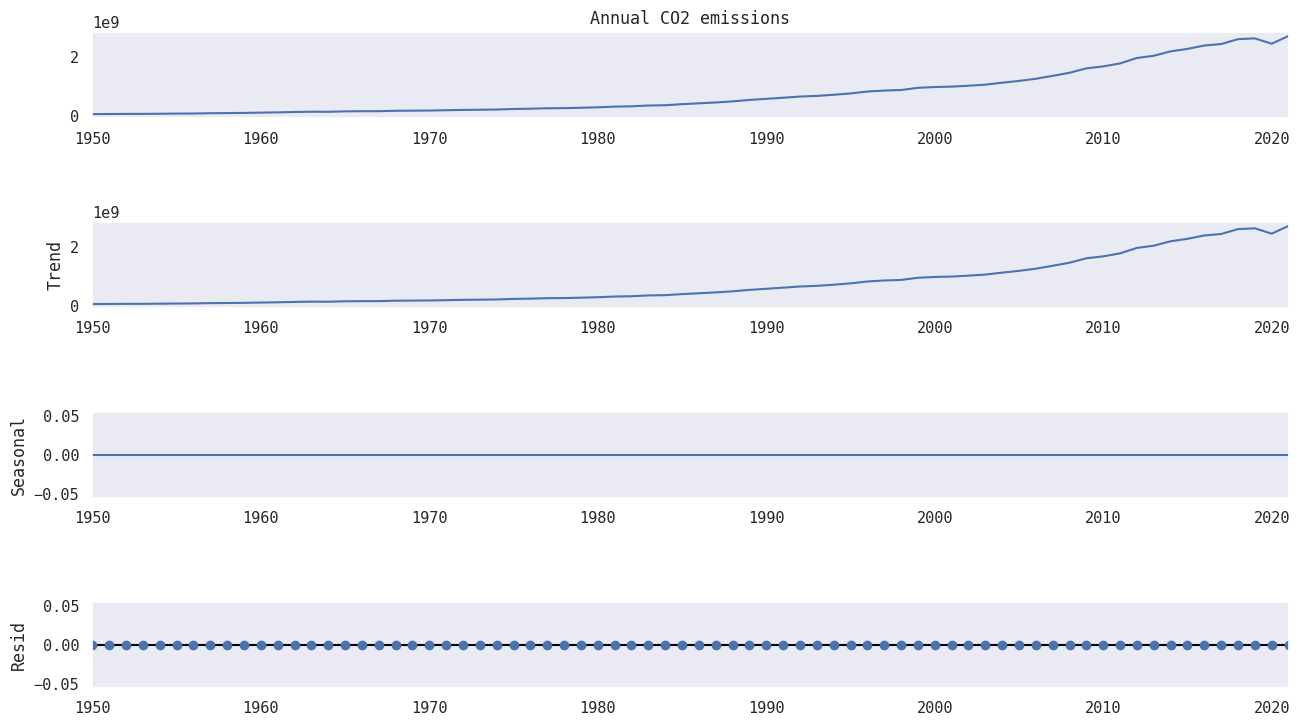

In [8]:
#trend, seasonality, and the residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Annual CO2 emissions'], period=1)
figure = plt.figure()
figure = decomposition.plot()
figure.set_size_inches(15, 8)

In [9]:
#forcasting model
model = sm.tsa.statespace.SARIMAX(df['Annual CO2 emissions'],order=(0,1,0), seasonal_order=(1,3,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.94765D+00    |proj g|=  6.13091D-01

At iterate    5    f=  9.54055D+00    |proj g|=  9.14412D-03

At iterate   10    f=  9.53312D+00    |proj g|=  1.61527D-03

At iterate   15    f=  9.53199D+00    |proj g|=  2.62682D-05

At iterate   20    f=  9.53184D+00    |proj g|=  3.41318D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     25      1     0     0   6.357D-06   9.532D+00
  F =   9.5318218516782576     

CONVERG

<AxesSubplot:xlabel='Year'>

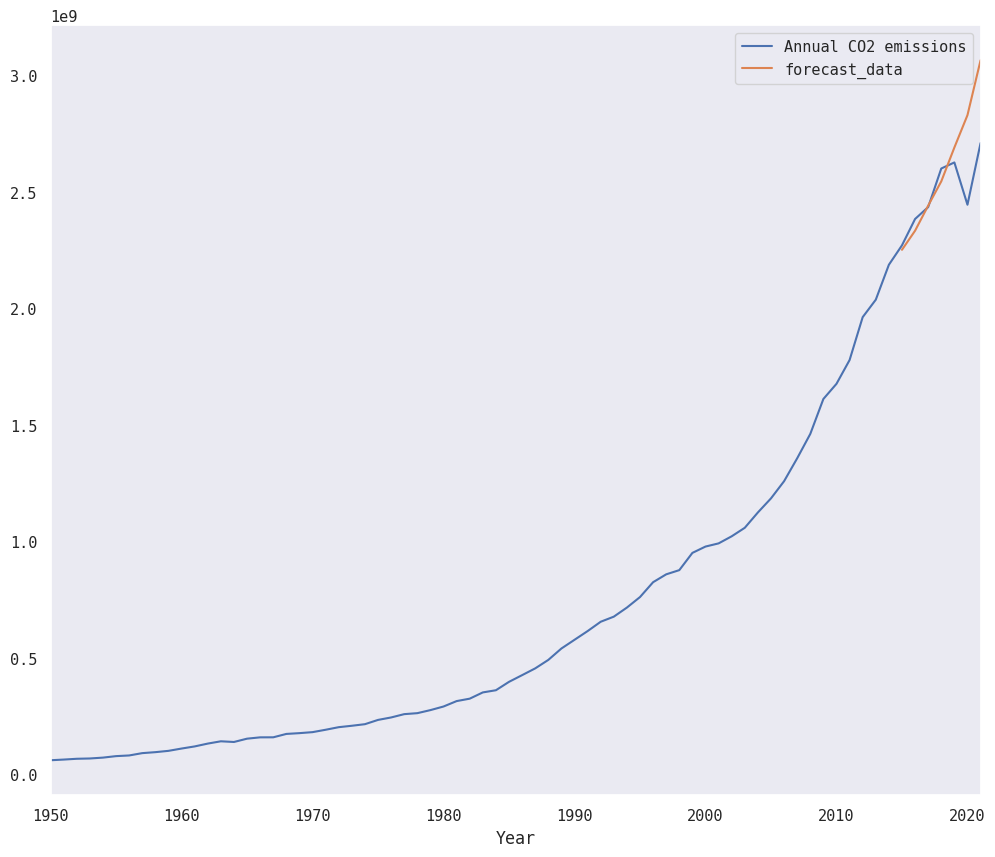

In [10]:
#
df['forecast_data'] = ARIMAresult.predict(start = '2015-01-01' , end= '2100-01-01', dynamic= True)
df[['Annual CO2 emissions','forecast_data']].plot (figsize= (12,10))

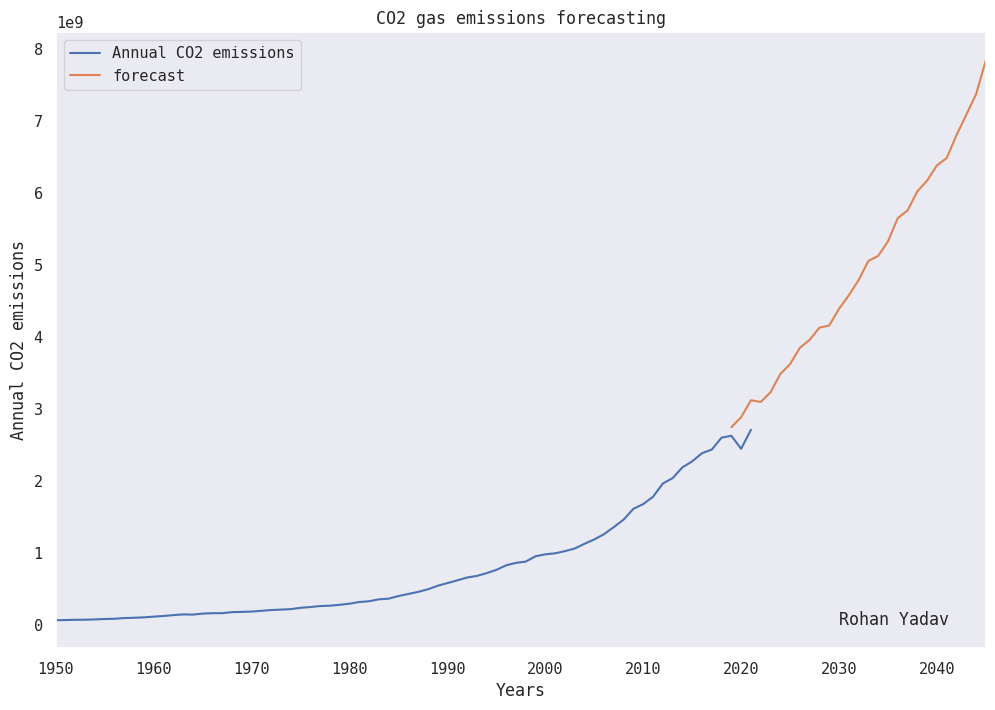

In [13]:
#forcasting
from pandas.tseries.offsets import DateOffset 
future_dates=[df.index[-1]+ DateOffset(years=x) for x in range(0,25)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = ARIMAresult.predict(start = '2019-01-01', end = '2100-01-01', dynamic= True)
future_df[['Annual CO2 emissions', 'forecast']].plot(figsize=(12, 8)).set(title='CO2 gas emissions forecasting')

plt.xlabel("Years")
plt.ylabel("Annual CO2 emissions")
plt.text("2030",0,"Rohan Yadav")
plt.savefig('co2emissionforcast.png', dpi=300, bbox_inches='tight')
plt.show()